# Flood data Analysis for different sensor designs

In [1]:
%matplotlib inline
import numpy as np
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
from datetime import timedelta
from matplotlib.dates import DateFormatter
from dateutil import tz
%config InlineBackend.figure_format = 'retina'
#sns.set_theme(style="darkgrid")
sns.set(style="darkgrid")

## Reading raw sensor data:
Reading the data collected from four different sensor designs(shown below) into a dataframe

||  Original Rectangular housing | Larger outer housing using [Maxtemp](https://www.maxbotix.com/Ultrasonic_Sensors/MB7955.htm)| Louvered temperature shield | Internal Sensor |
|--|----------|-------------------|------------------------|-------|
||<img src="street-mounted.png" width="360" >|<img src="larger-housing.png" width="320" >|<img src="Louvered-design.png" width="360" >|<img src="Sensor-inside.png" width="360" >|

In [2]:
# sensor_2
df_original = pd.read_csv('original_out_Feb10.csv')
df_original.columns=['Time', 'original_distance']
df_original["Time"] = pd.to_datetime(df_original["Time"], format = '%Y-%m-%d %H:%M:%S', errors ='coerce')
df_original.set_index('Time', inplace=True)
# sensor_3
df_large = pd.read_csv('large_out_Feb10.csv')
df_large.columns=['Time', 'large_distance']
df_large["Time"] = pd.to_datetime(df_large["Time"], format = '%Y-%m-%d %H:%M:%S', errors ='coerce')
df_large.set_index('Time', inplace=True)
# sensor_5
df_louvered = pd.read_csv('louvered_out_Feb10.csv')
df_louvered.columns=['Time', 'louvered_distance']
df_louvered["Time"] = pd.to_datetime(df_louvered["Time"], format = '%Y-%m-%d %H:%M:%S', errors ='coerce')
df_louvered.set_index('Time', inplace=True)
# sensor_6
df_inside = pd.read_csv('inside_out_Feb10.csv')
df_inside.columns=['Time', 'inside_distance']
df_inside["Time"] = pd.to_datetime(df_inside["Time"], format = '%Y-%m-%d %H:%M:%S', errors ='coerce')
df_inside.set_index('Time', inplace=True)

In [3]:
df = df_original.join(df_large, how='outer').join(df_louvered, how='outer').join(df_inside, how='outer')
df

,original_distance,large_distance,louvered_distance,inside_distance
Time,,,,
2021-01-23 00:06:47+00:00,NaN,1003.0,NaN,NaN
2021-01-23 00:07:49+00:00,2704.0,NaN,NaN,NaN
2021-01-23 00:08:49+00:00,NaN,NaN,NaN,1098.0
2021-01-23 00:10:11+00:00,NaN,NaN,966.0,NaN
2021-01-23 00:12:02+00:00,NaN,1001.0,NaN,NaN
...,...,...,...,...
2021-01-31 23:59:03+00:00,NaN,1002.0,NaN,NaN
2021-01-31 23:59:10+00:00,4988.0,NaN,NaN,NaN
2021-01-31 23:59:18+00:00,NaN,NaN,965.0,NaN


## Data Cleaning

The raw data needs some basic cleaning to remove the anomalies-4999's are observed because of No-return of the ultrasonic pulse-in signal. This was observed rarely at random times potentially due to external interference and in winters due to reflections from snow. Furthermore, a bad network packet might cause zeroes but not observed in this dataset.

In [4]:
df['original_distance'] = df[(df['original_distance']<4000) & (df['original_distance']!=0)]

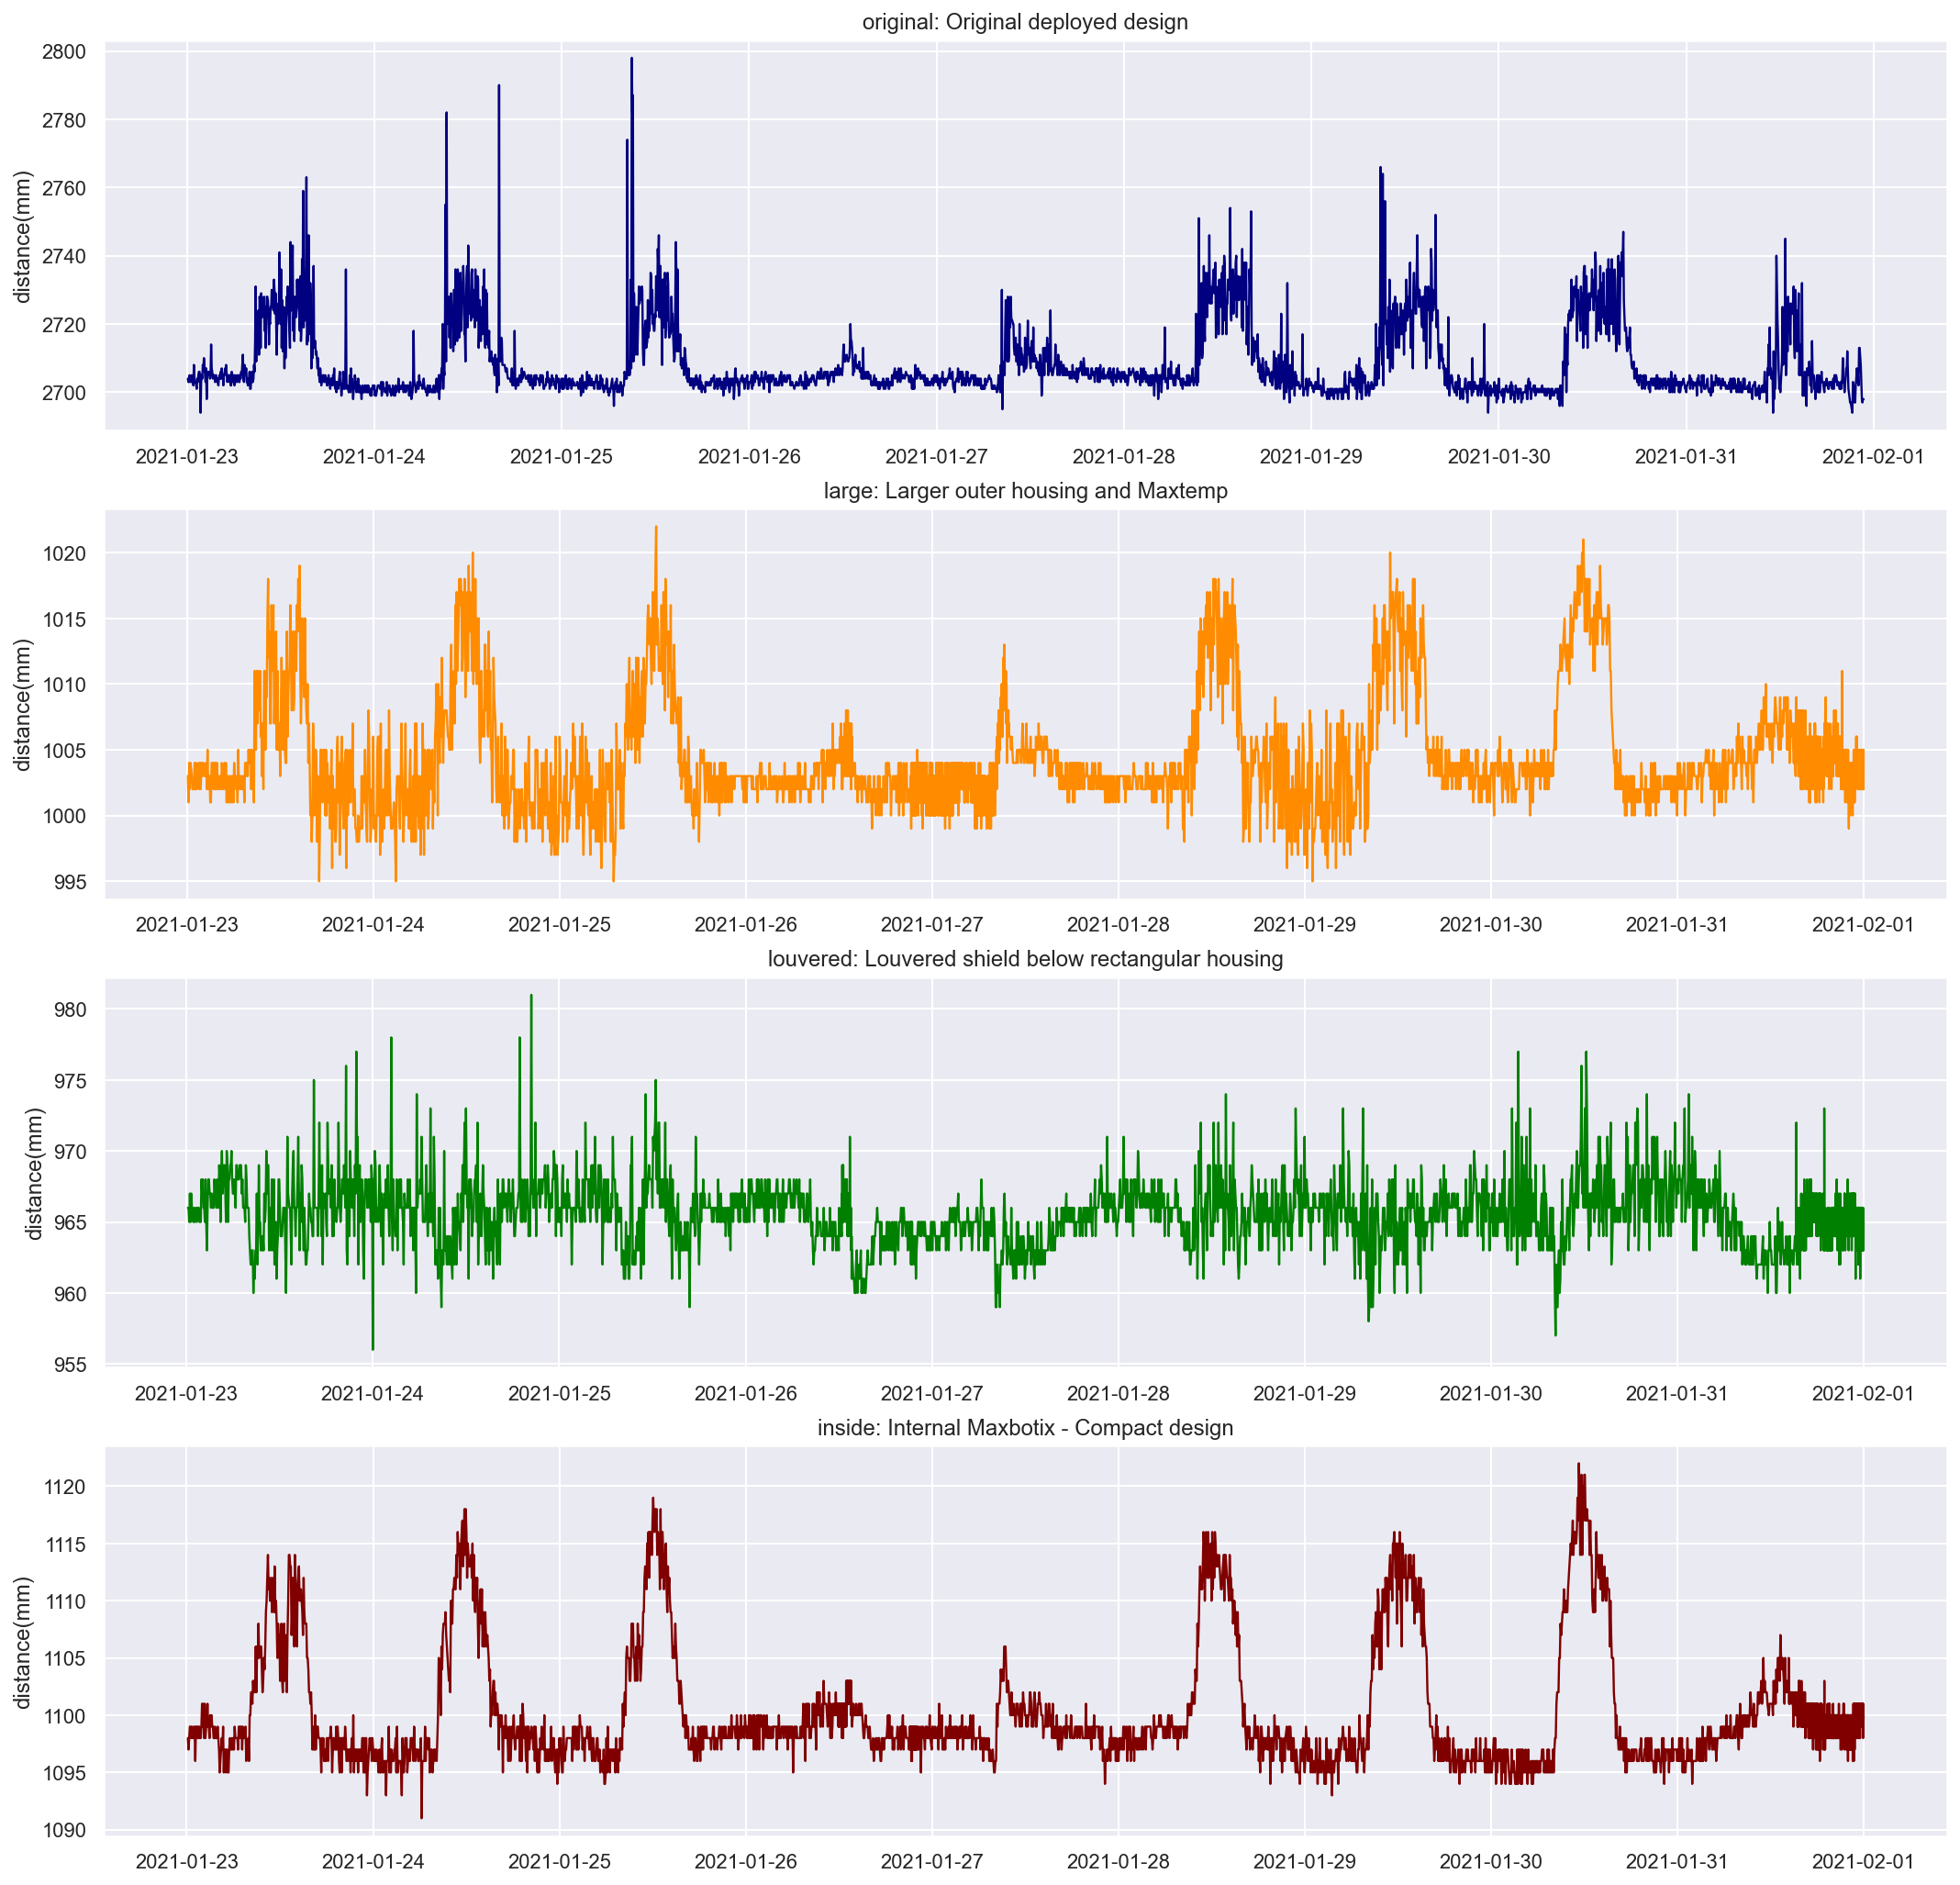

In [5]:
fig, (ax1,ax2,ax3,ax4) = plt.subplots(4,1)
fig.set_size_inches(18, 18.00)
start, end = '2021-01-22', '2021-01-31'
#ax.plot(df_original_transformed['original depth'])
ax1.plot(df.loc[start:end, 'original_distance'].dropna(), linestyle='-', linewidth=1.2, color='navy')
ax2.plot(df.loc[start:end, 'large_distance'].dropna(), linestyle='-', linewidth=1.2, color='darkorange')
ax3.plot(df.loc[start:end, 'louvered_distance'].dropna(), linestyle='-', linewidth=1.2, color='green')
ax4.plot(df.loc[start:end, 'inside_distance'].dropna(), linestyle='-', linewidth=1.2, color='maroon')
ax1.set_title('original: Original deployed design')
ax2.set_title('large: Larger outer housing and Maxtemp')
ax3.set_title('louvered: Louvered shield below rectangular housing')
ax4.set_title('inside: Internal Maxbotix - Compact design')
ax1.set_ylabel('distance(mm)')
ax2.set_ylabel('distance(mm)')
ax3.set_ylabel('distance(mm)')
ax4.set_ylabel('distance(mm)')
plt.show()

## Statistical analysis

Calculating Mean, Standard Deviation, Variance and Range (max,min) for the different sensor designs.

### Mean

In [6]:
mean_original = df["original_distance"].mean()
mean_original

2708.296632996633

In [7]:
mean_large = df["large_distance"].mean()
mean_large

1003.9519017911049

In [8]:
mean_louvered = df["louvered_distance"].mean()
mean_louvered

965.4062324536777

In [9]:
mean_inside = df["inside_distance"].mean()
mean_inside

1100.0503023639362

### Standard Deviation

In [10]:
sd_original = np.std(df["original_distance"])
sd_original

10.7178014594676

In [11]:
sd_large = np.std(df["large_distance"])
sd_large

3.5066421902164255

In [12]:
sd_louvered = np.std(df["louvered_distance"])
sd_louvered

2.131893425749949

In [13]:
sd_inside = np.std(df["inside_distance"])
sd_inside

4.511051564739257

### Variance

In [14]:
var_original = np.var(df["original_distance"])
var_original

114.87126812456582

In [15]:
var_large = np.var(df["large_distance"])
var_large

12.296539450205849

In [16]:
var_louvered = np.var(df["louvered_distance"])
var_louvered

4.544969578755853

In [17]:
var_inside = np.var(df["inside_distance"])
var_inside

20.349586219736505

| |  Original Rectangular housing | Larger outer housing using [Maxtemp](https://www.maxbotix.com/Ultrasonic_Sensors/MB7955.htm)| Louvered temperature shield | Internal Sensor |
|--|----------|-------------------|------------------------|-------|
| |<img src="street-mounted.png" width="360" >|<img src="larger-housing.png" width="320" >|<img src="Louvered-design.png" width="360" >|<img src="Sensor-inside.png" width="360" >|
| **Mean** |$2708 mm$|$1004 mm$|$965 mm$|$1100 mm$|
| **Standard Deviation** |$10.7mm$|$3.5mm$|$2.1mm$|$4.5mm$|
| **Variance** |$114.9 mm^2$|$12.3 mm^2$|$4.5 mm^2$|$20.3 mm^2$|

## Calculating depth by transforming the data using mean

The distance readings are inverted and shifted to the height at which the sensors are fixed to calculate the depth. Assuming mean of the data is the height at the sensors are fixed, the distance readings are shifted so that the baseline is 0.

In [18]:
df["original_distance"] = df["original_distance"].apply(lambda x:((-1)*x + mean_original))
df["large_distance"] = df["large_distance"].apply(lambda x:((-1)*x + mean_large))
df["louvered_distance"] = df["louvered_distance"].apply(lambda x:((-1)*x + mean_louvered))
df["inside_distance"] = df["inside_distance"].apply(lambda x:((-1)*x + mean_inside))

In [19]:
df = df.rename(columns={"original_distance": "original depth", "large_distance": "large depth", "louvered_distance": "louvered depth","inside_distance": "inside depth"})

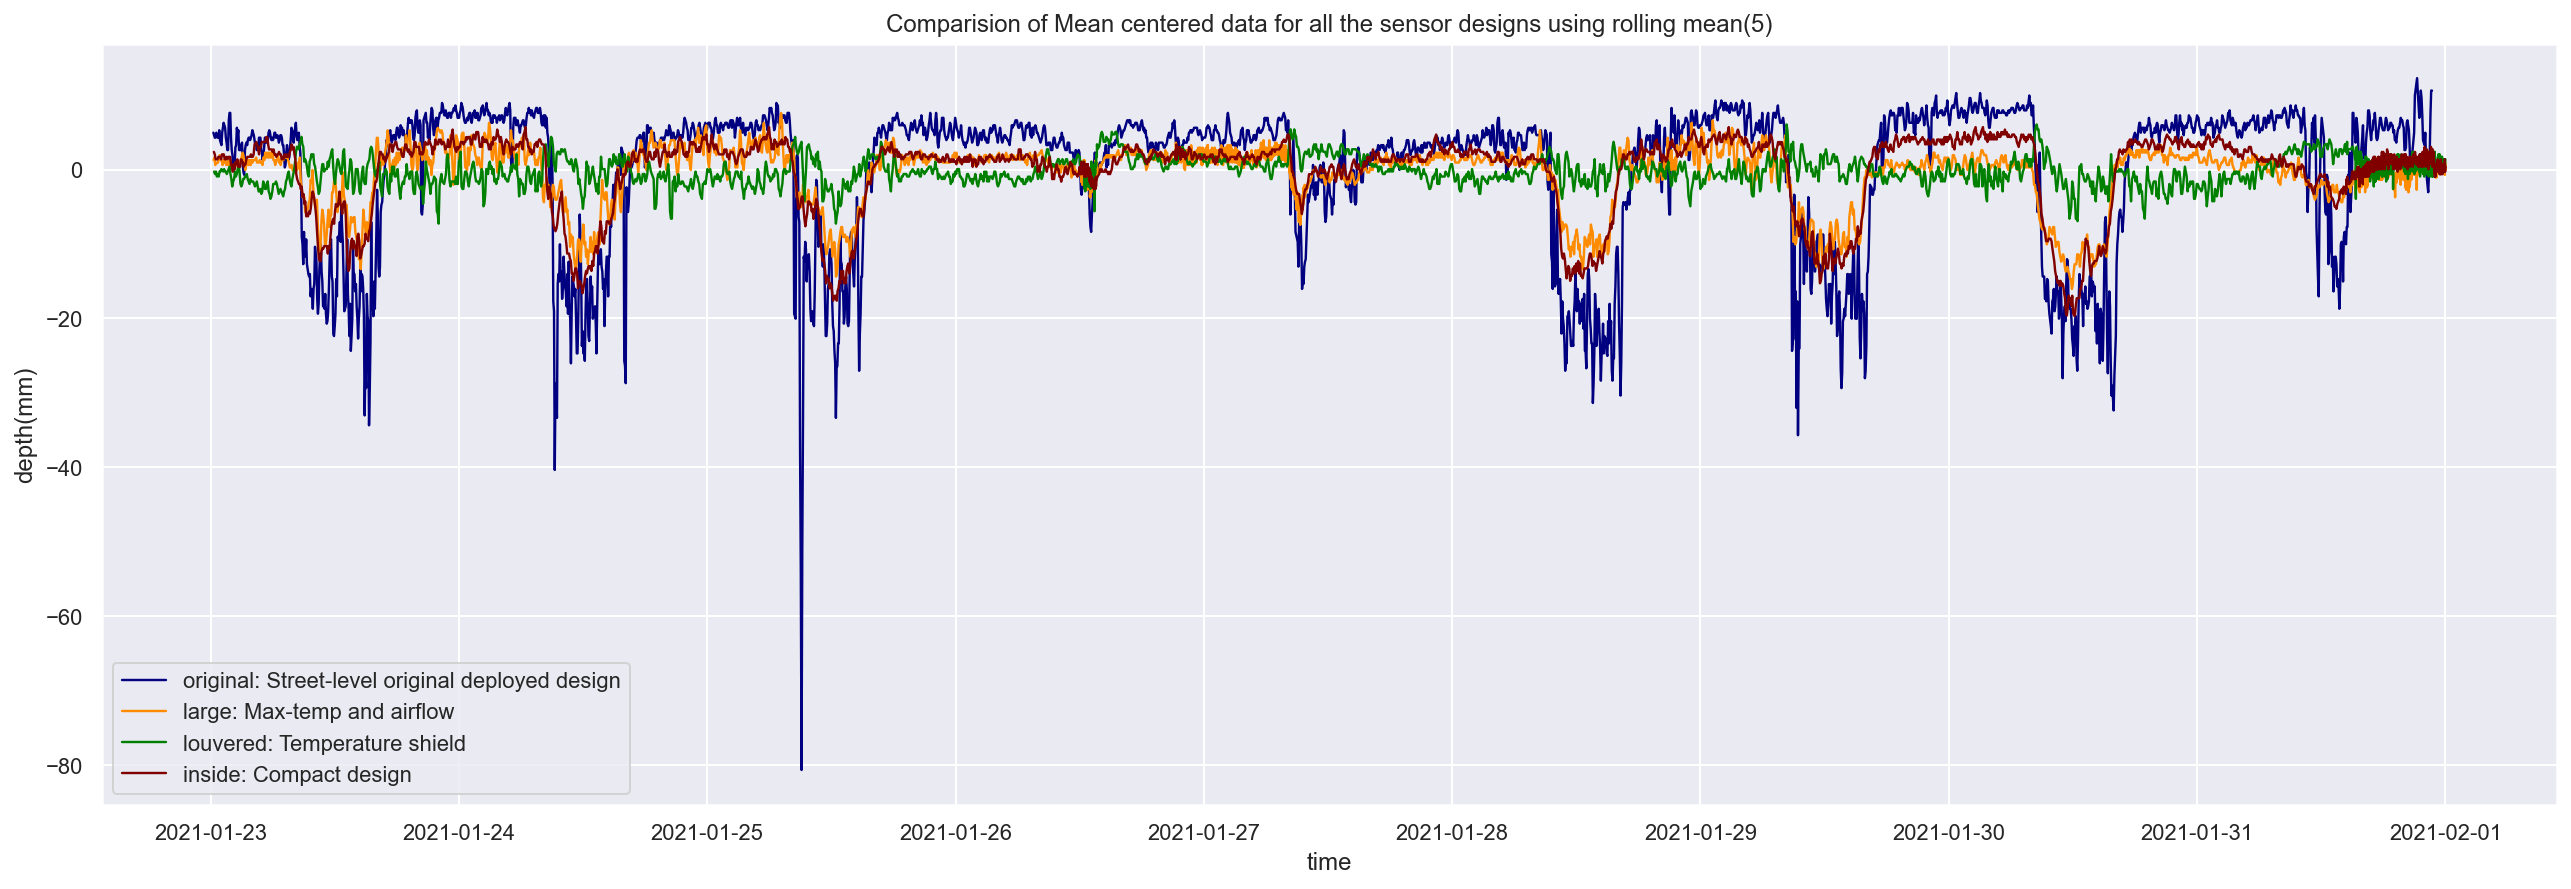

In [20]:
fig, ax = plt.subplots()
fig.set_size_inches(22, 7.00)
start, end = '2021-01-22', '2021-01-31'
#ax.plot(df_original_transformed['original depth'])
ax.plot(df.loc[start:end, 'original depth'].dropna().rolling(3).mean(), linestyle='-', linewidth=1.2, label='original: Street-level original deployed design', color='navy')
ax.plot(df.loc[start:end, 'large depth'].dropna().rolling(3).mean(), linestyle='-', linewidth=1.2, label='large: Max-temp and airflow', color='darkorange')
ax.plot(df.loc[start:end, 'louvered depth'].dropna().rolling(3).mean(), linestyle='-', linewidth=1.2, label='louvered: Temperature shield', color='green')
ax.plot(df.loc[start:end, 'inside depth'].dropna().rolling(3).mean(), linestyle='-', linewidth=1.2, label='inside: Compact design', color='maroon')
plt.title('Comparision of Mean centered data for all the sensor designs using rolling mean(5)')
plt.xlabel('time')
plt.ylabel('depth(mm)')
ax.legend()
plt.show()

The stable regions are not centered at 0, this is due to the noise in the negative y-axis. Centering the data around mean is not an ideal solution to calibrate the stable sensor data. Therefore in the next section, peak data and stable data have been seperated to study their charecteristics

## Peak data Analysis:

The solar blips are more noticable when there is direct sunlight on the sensors and can be observed periodically from the data between the hours 8 am to 5 pm.

**Selecting data from the data frames from 8 am to 5pm**

In [21]:
df_peaks = df.between_time('8:00', '17:00')

In [22]:
df_peaks

,original depth,large depth,louvered depth,inside depth
Time,,,,
2021-01-23 08:00:54+00:00,NaN,-0.048098,NaN,NaN
2021-01-23 08:01:18+00:00,NaN,NaN,NaN,4.050302
2021-01-23 08:01:56+00:00,2.296633,NaN,NaN,NaN
2021-01-23 08:04:59+00:00,NaN,NaN,1.406232,NaN
2021-01-23 08:06:11+00:00,NaN,-0.048098,NaN,NaN
...,...,...,...,...
2021-01-31 16:59:03+00:00,NaN,-0.048098,NaN,NaN
2021-01-31 16:59:29+00:00,NaN,NaN,NaN,1.050302
2021-01-31 16:59:33+00:00,NaN,-0.048098,NaN,NaN


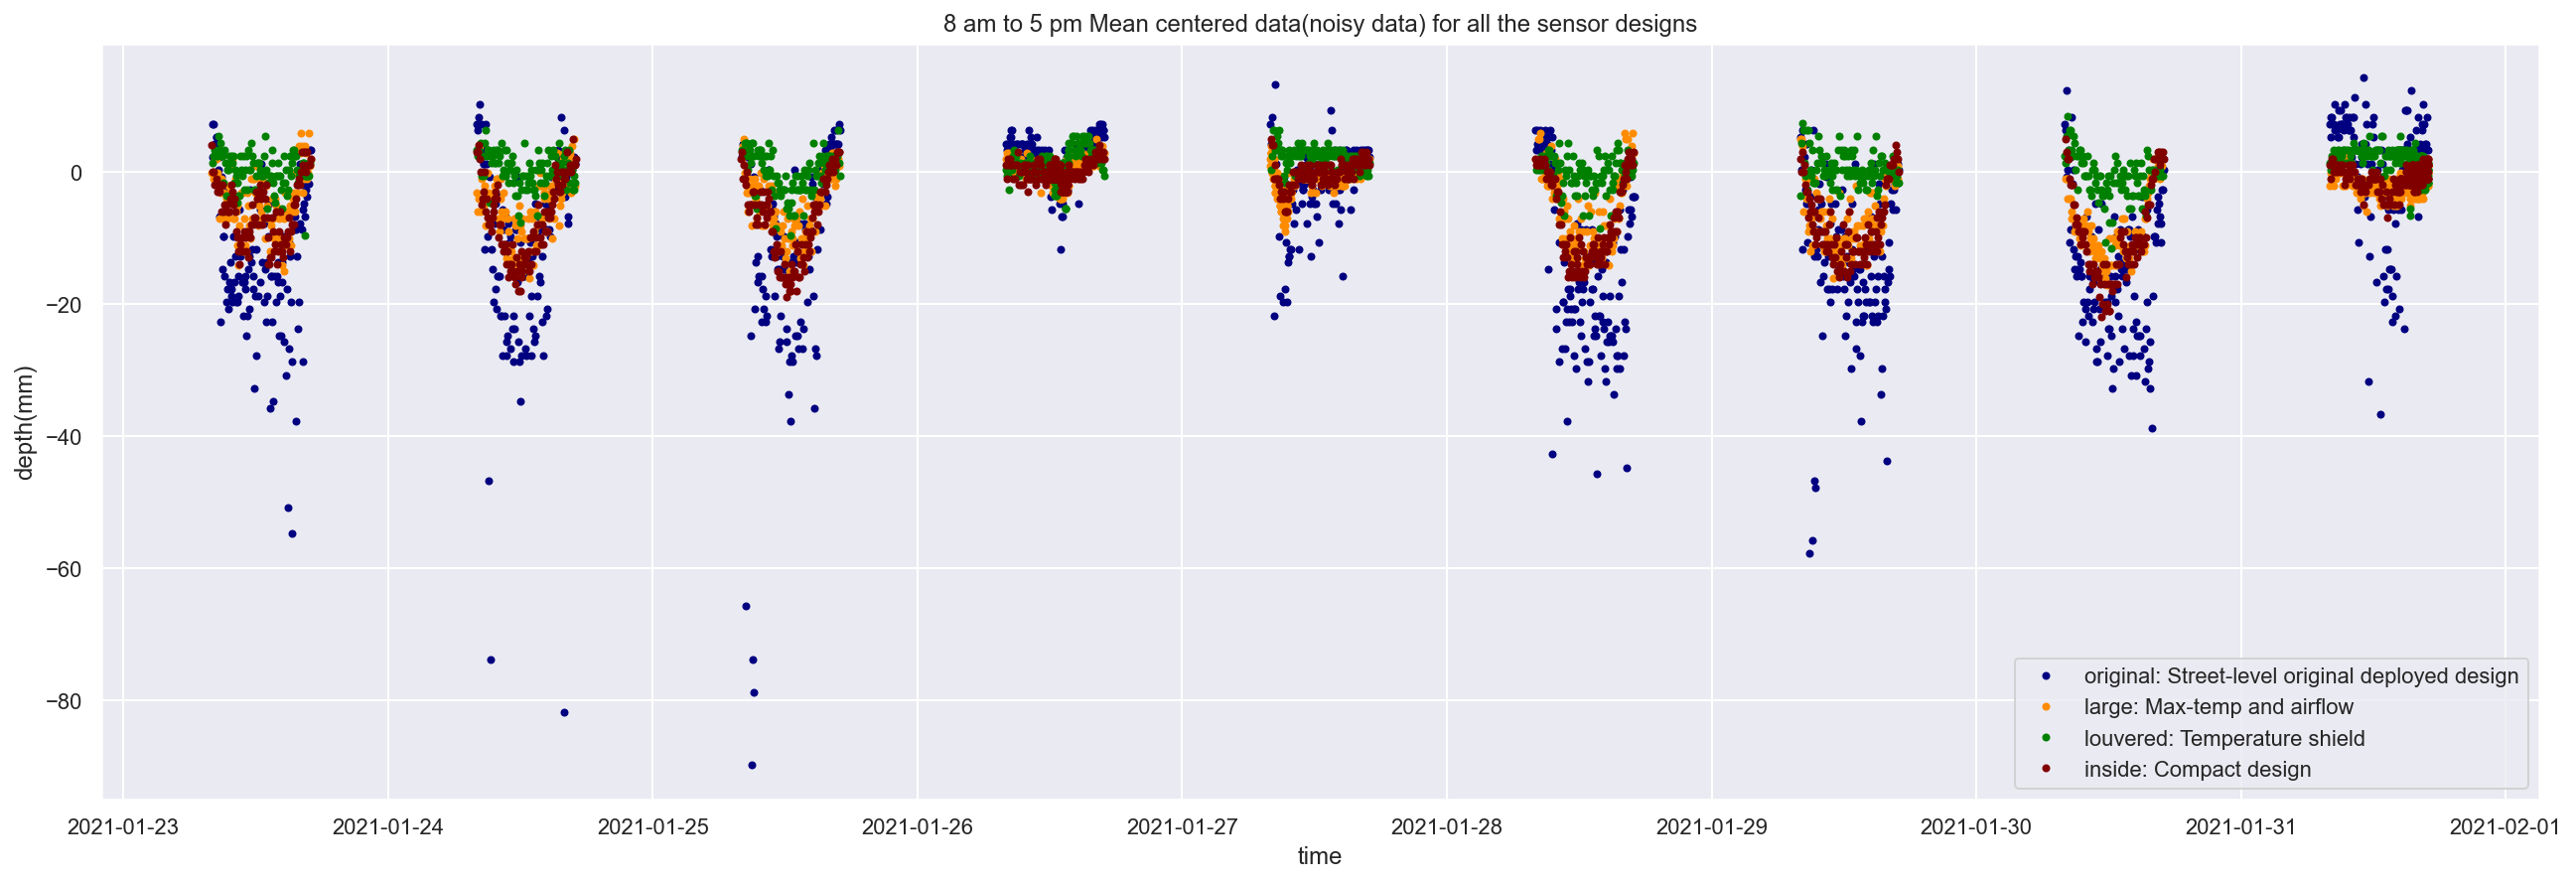

In [23]:
fig, ax = plt.subplots()
fig.set_size_inches(22, 7.00)
start, end = '2021-01-22', '2021-01-31'
ax.plot(df_peaks.loc[start:end, 'original depth'].dropna(),'.', label='original: Street-level original deployed design', color='navy')
ax.plot(df_peaks.loc[start:end, 'large depth'].dropna(),'.', label='large: Max-temp and airflow', color='darkorange')
ax.plot(df_peaks.loc[start:end, 'louvered depth'].dropna(),'.', label='louvered: Temperature shield', color='green')
ax.plot(df_peaks.loc[start:end, 'inside depth'].dropna(),'.', label='inside: Compact design', color='maroon')
plt.title('8 am to 5 pm Mean centered data(noisy data) for all the sensor designs')
plt.xlabel('time')
plt.ylabel('depth(mm)')
ax.legend()
plt.show()

## Stable data Analysis:

In [24]:
df_stable = df.between_time('20:00', '06:00')

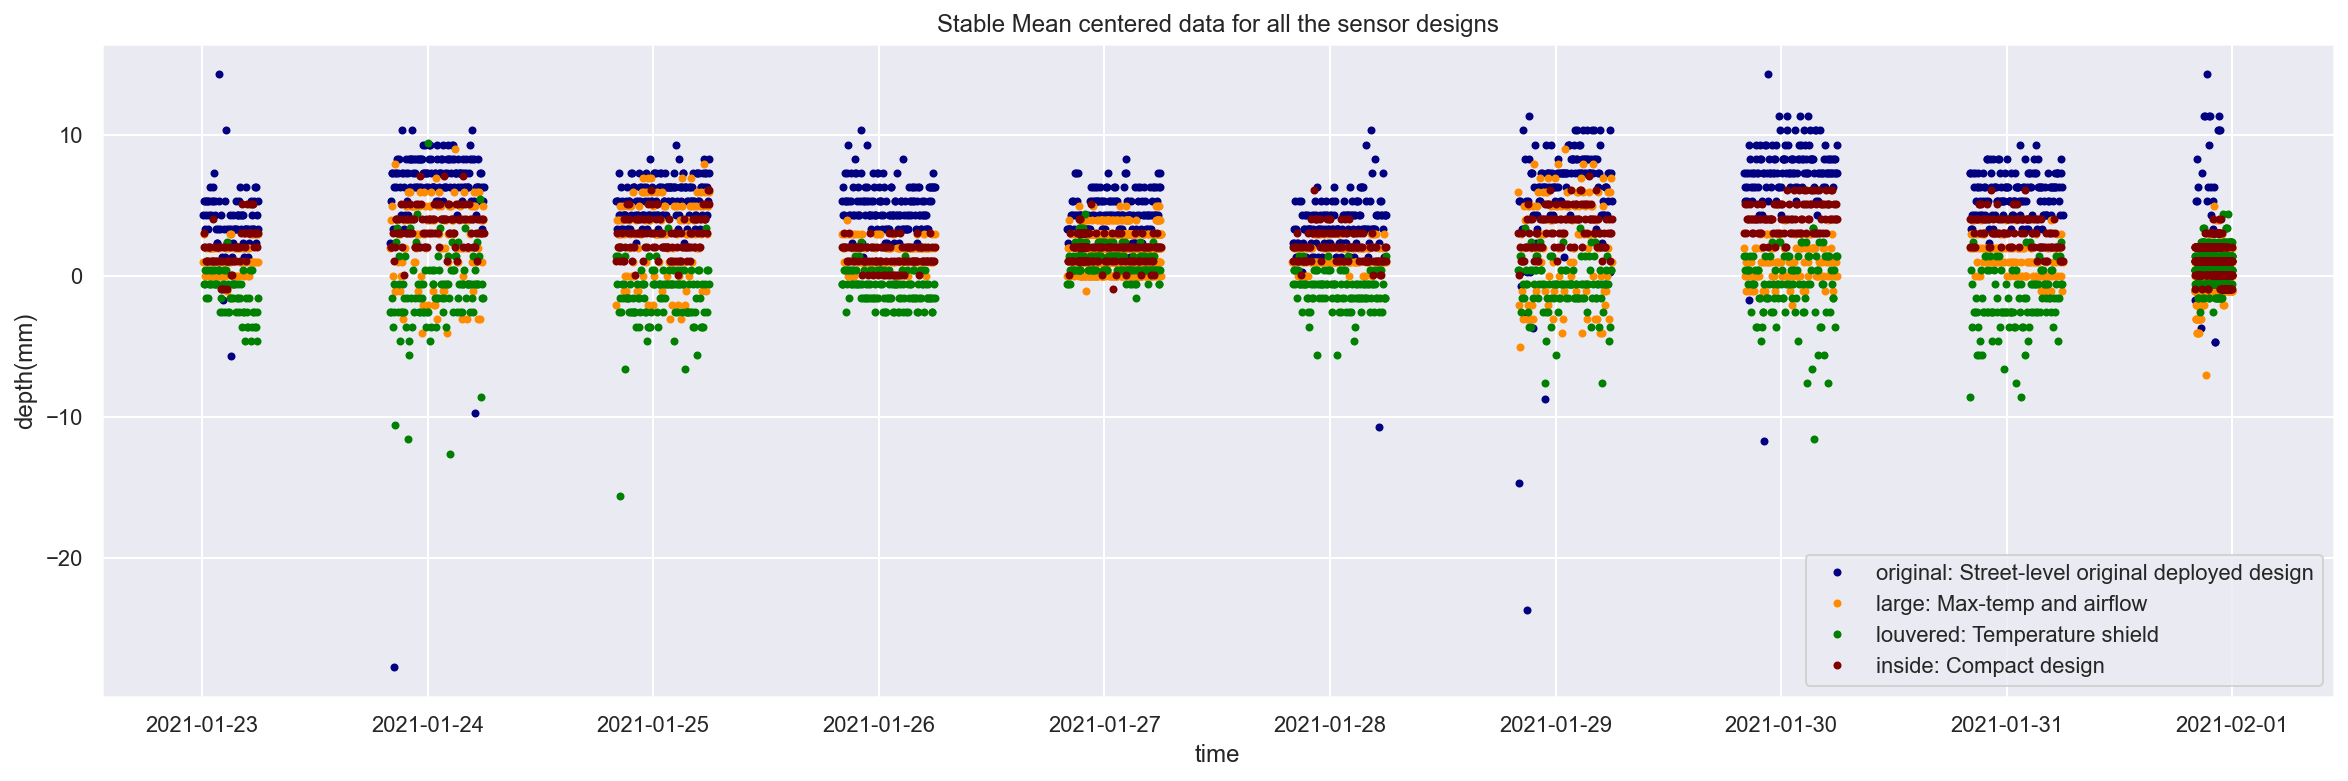

In [25]:
fig, ax = plt.subplots()
fig.set_size_inches(20, 6.00)
start, end = '2021-01-22', '2021-01-31'
ax.plot(df_stable.loc[start:end, 'original depth'].dropna(),'.', label='original: Street-level original deployed design', color='navy')
ax.plot(df_stable.loc[start:end, 'large depth'].dropna(),'.', label='large: Max-temp and airflow', color='darkorange')
ax.plot(df_stable.loc[start:end, 'louvered depth'].dropna(),'.', label='louvered: Temperature shield', color='green')
ax.plot(df_stable.loc[start:end, 'inside depth'].dropna(),'.', label='inside: Compact design', color='maroon')
plt.title('Stable Mean centered data for all the sensor designs')
plt.xlabel('time')
plt.ylabel('depth(mm)')
ax.legend()
plt.show()

In [26]:
df_stable['original depth'].mean()

5.478005545652588

In [27]:
df_stable['large depth'].mean()

1.5023795642664095

In [28]:
df_stable['louvered depth'].mean()

-0.42326686973229666

In [29]:
df_stable['inside depth'].mean()

2.1954004031519117

In [30]:
df['original depth'] = df['original depth'].apply(lambda x:x-5.4780)
df['large depth'] = df['large depth'].apply(lambda x:x-1.5023)
df['louvered depth'] = df['louvered depth'].apply(lambda x:x+0.4232)
df['inside depth'] = df['inside depth'].apply(lambda x:x-2.1954)

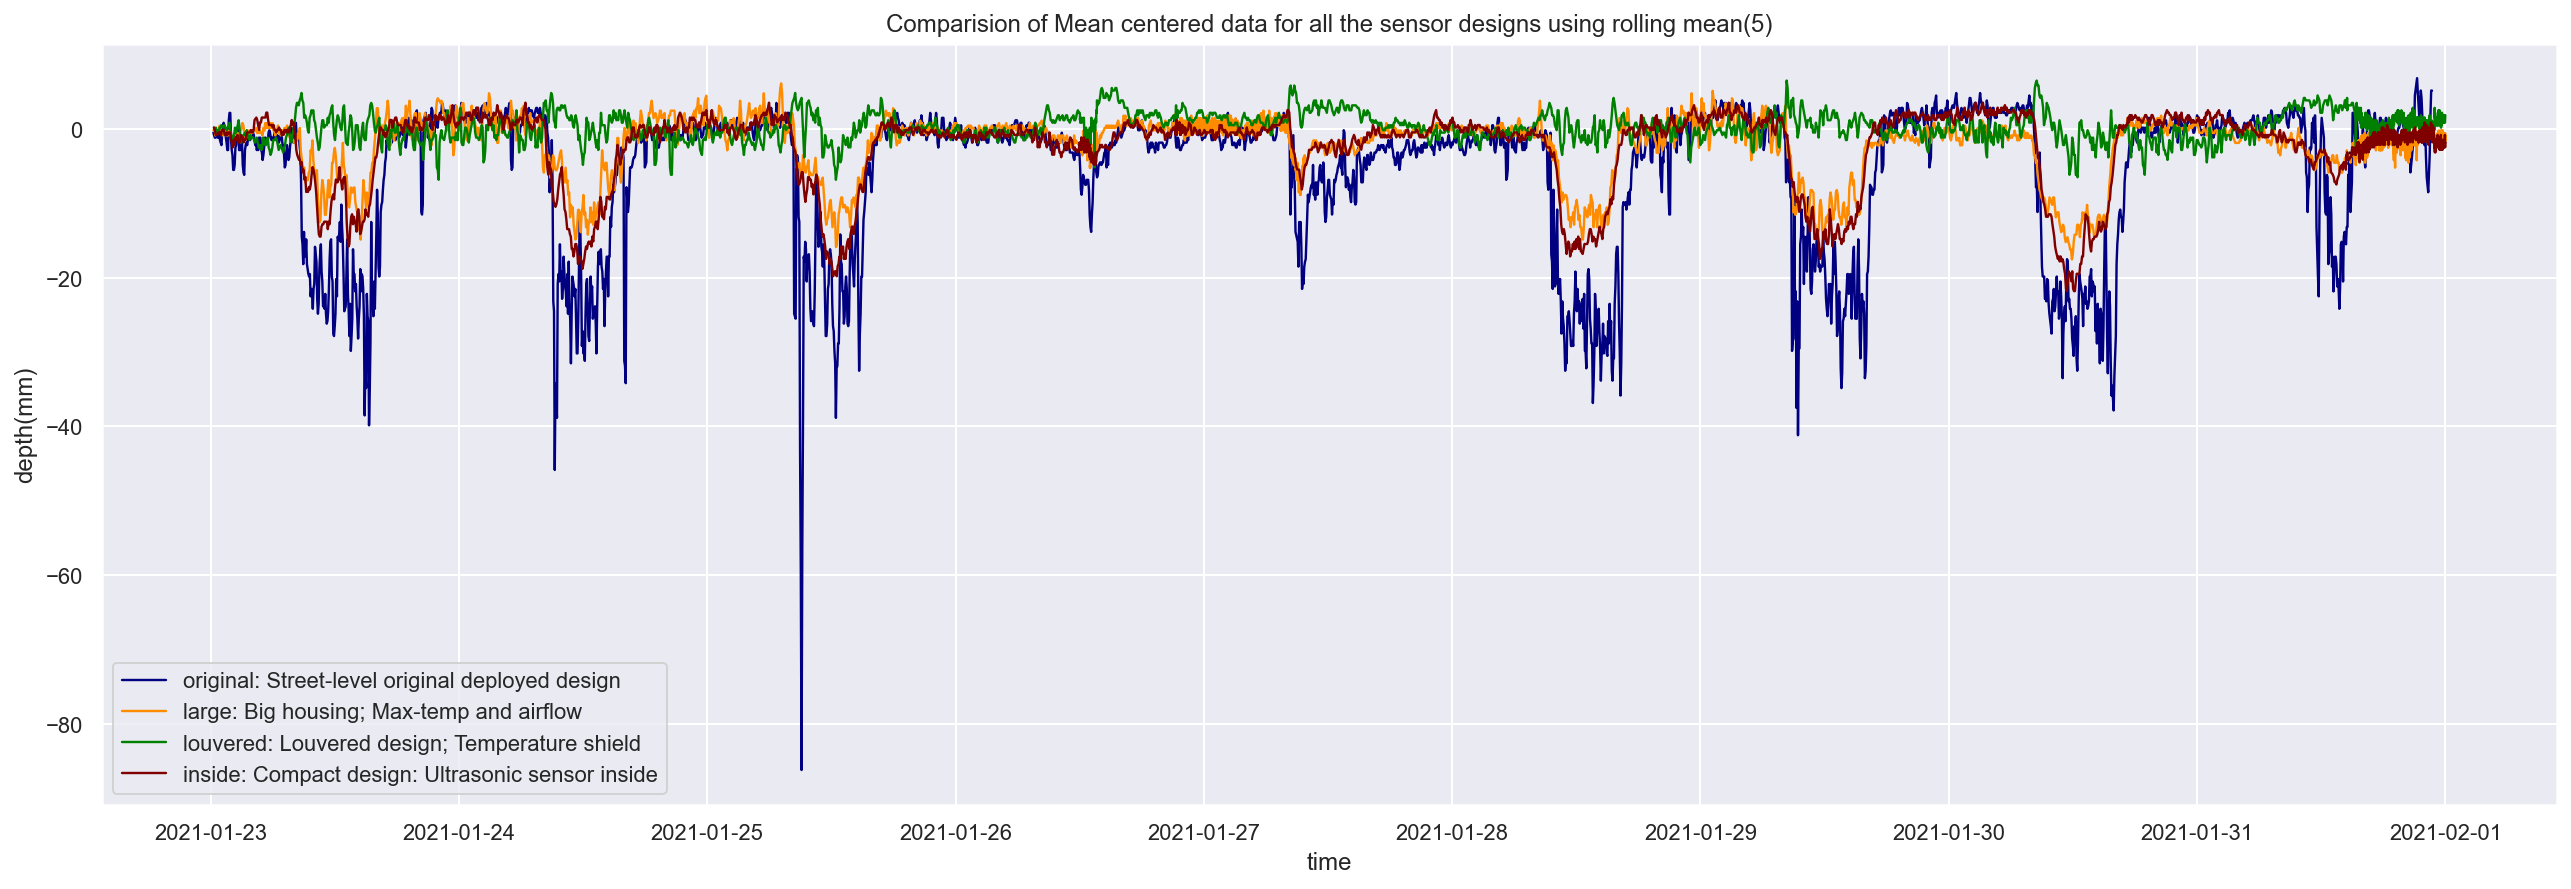

In [34]:
fig, ax = plt.subplots()
fig.set_size_inches(22, 7.00)
start, end = '2021-01-22', '2021-01-31'
ax.plot(df.loc[start:end, 'original depth'].dropna().rolling(3).mean(), linestyle='-', linewidth=1.2, label='original: Street-level original deployed design', color='navy')
ax.plot(df.loc[start:end, 'large depth'].dropna().rolling(3).mean(), linestyle='-', linewidth=1.2, label='large: Big housing; Max-temp and airflow', color='darkorange')
ax.plot(df.loc[start:end, 'louvered depth'].dropna().rolling(3).mean(), linestyle='-', linewidth=1.2, label='louvered: Louvered design; Temperature shield', color='green')
ax.plot(df.loc[start:end, 'inside depth'].dropna().rolling(3).mean(), linestyle='-', linewidth=1.2, label='inside: Compact design: Ultrasonic sensor inside', color='maroon')
plt.title('Comparision of Mean centered data for all the sensor designs using rolling mean(5)')
plt.xlabel('time')
plt.ylabel('depth(mm)')
ax.legend()
plt.show()

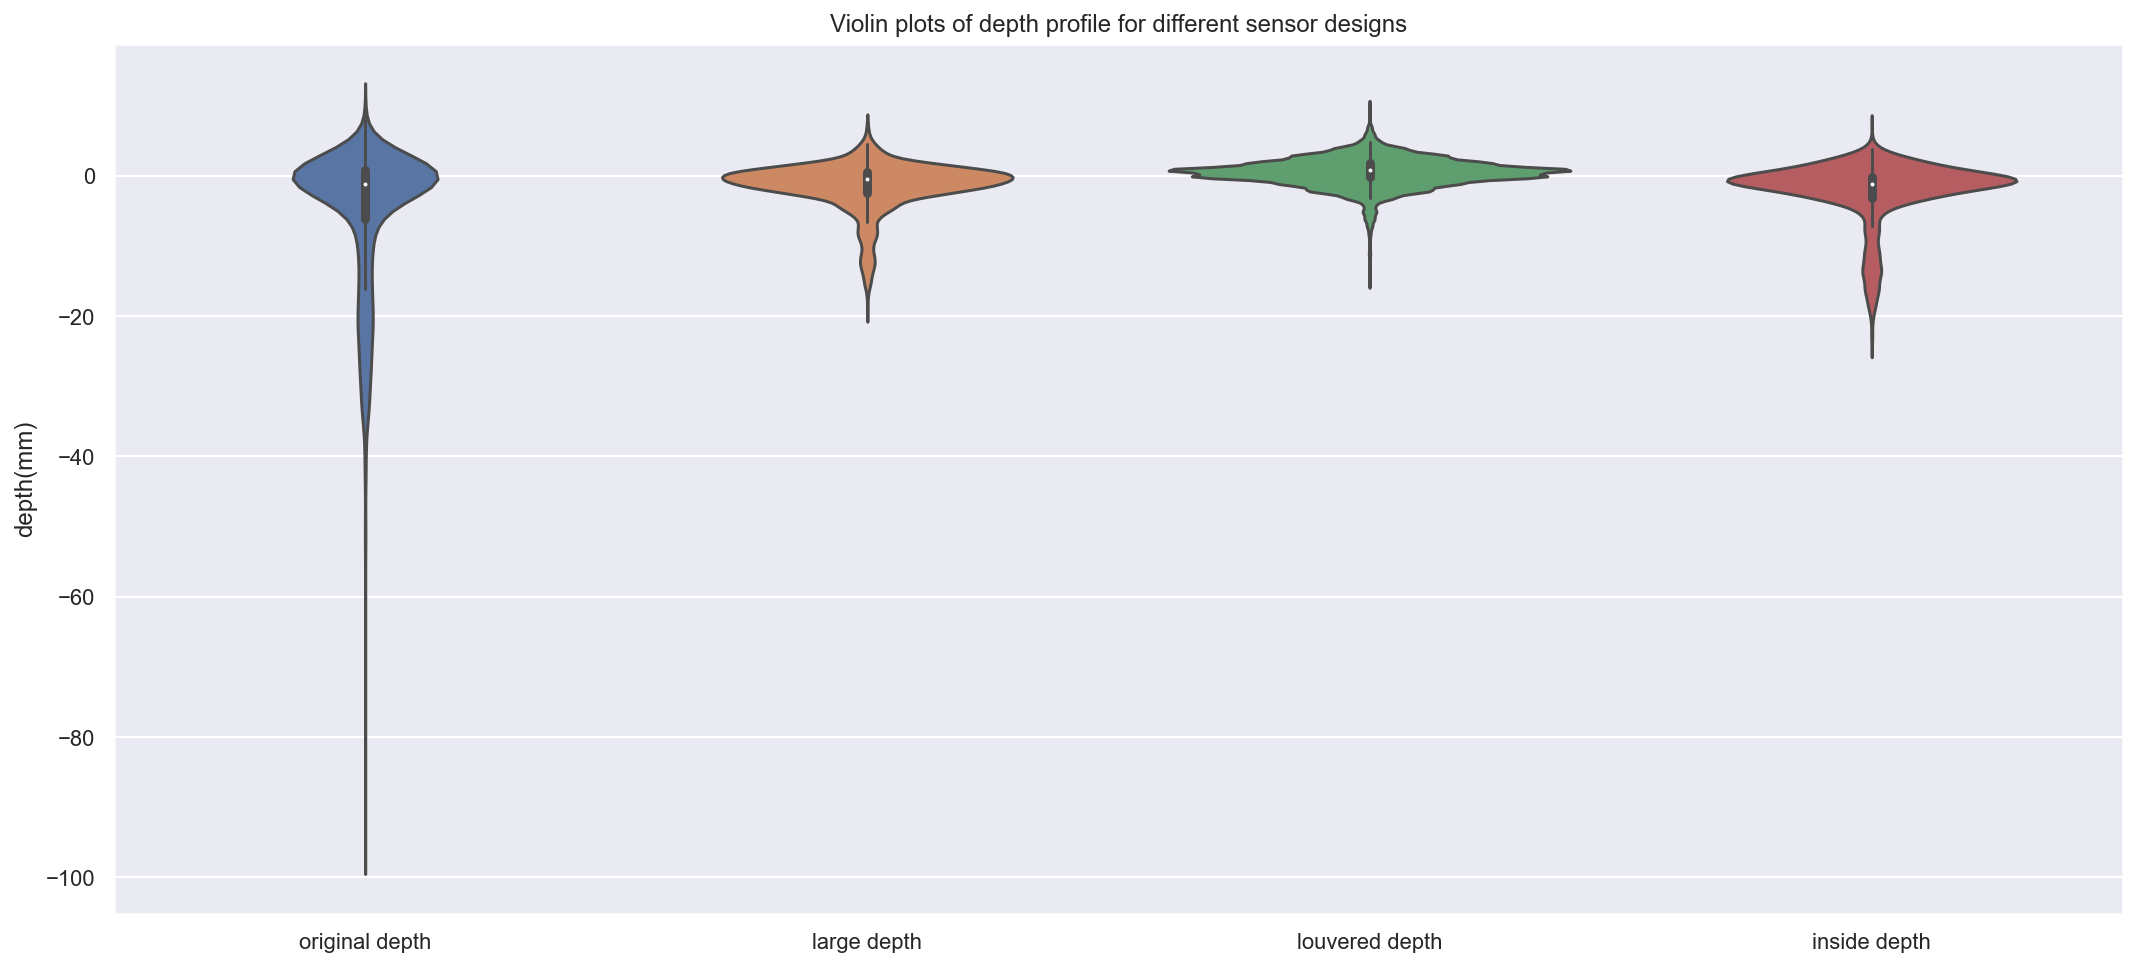

In [32]:
fig, ax = plt.subplots()
fig.set_size_inches(18, 8.00)
ax = sns.violinplot(data=df)
plt.title("Violin plots of depth profile for different sensor designs")
plt.ylabel('depth(mm)')
plt.show()